# Time series Analysis

In [196]:
import pandas as pd
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
from datetime import datetime, timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute

## 실습내용 요약
- Date and Time Data Types and Tools
- Time Series Basics
- Date Ranges, Frequencies, and Shifting
- Periods and Period Arithmetic
- Resampling and Frequency Conversion
- Time Series Plotting
- Moving Window Functions

## Date and Time Data Types and Tools

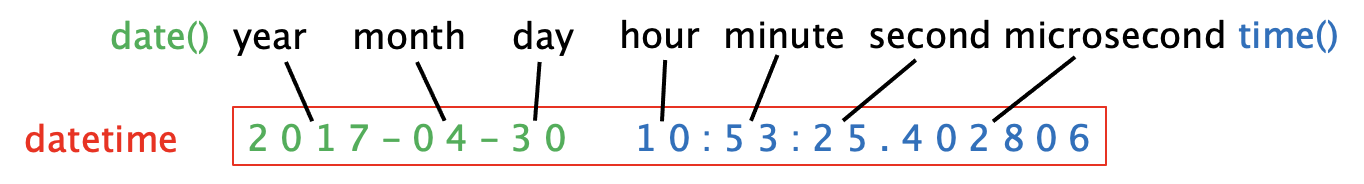

### Types in datetime module
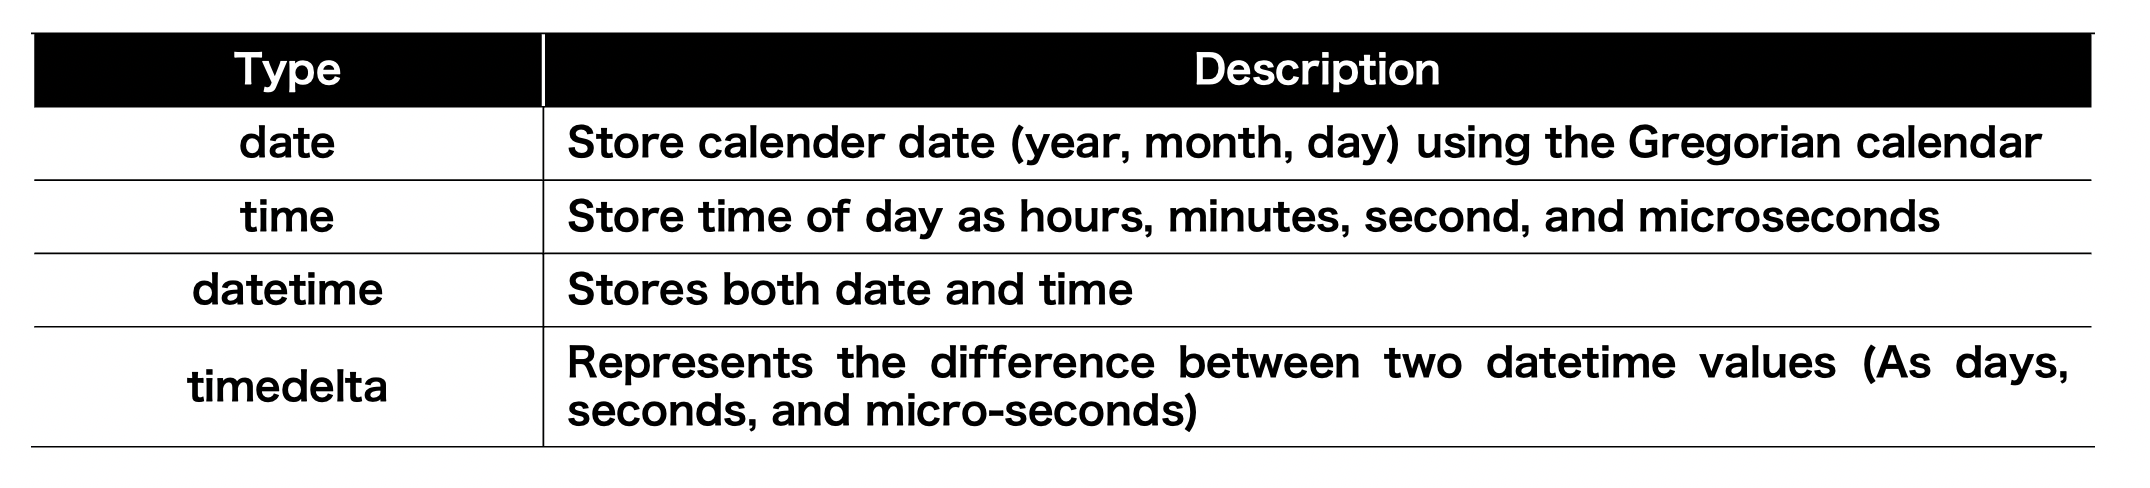

### Datetime format specification
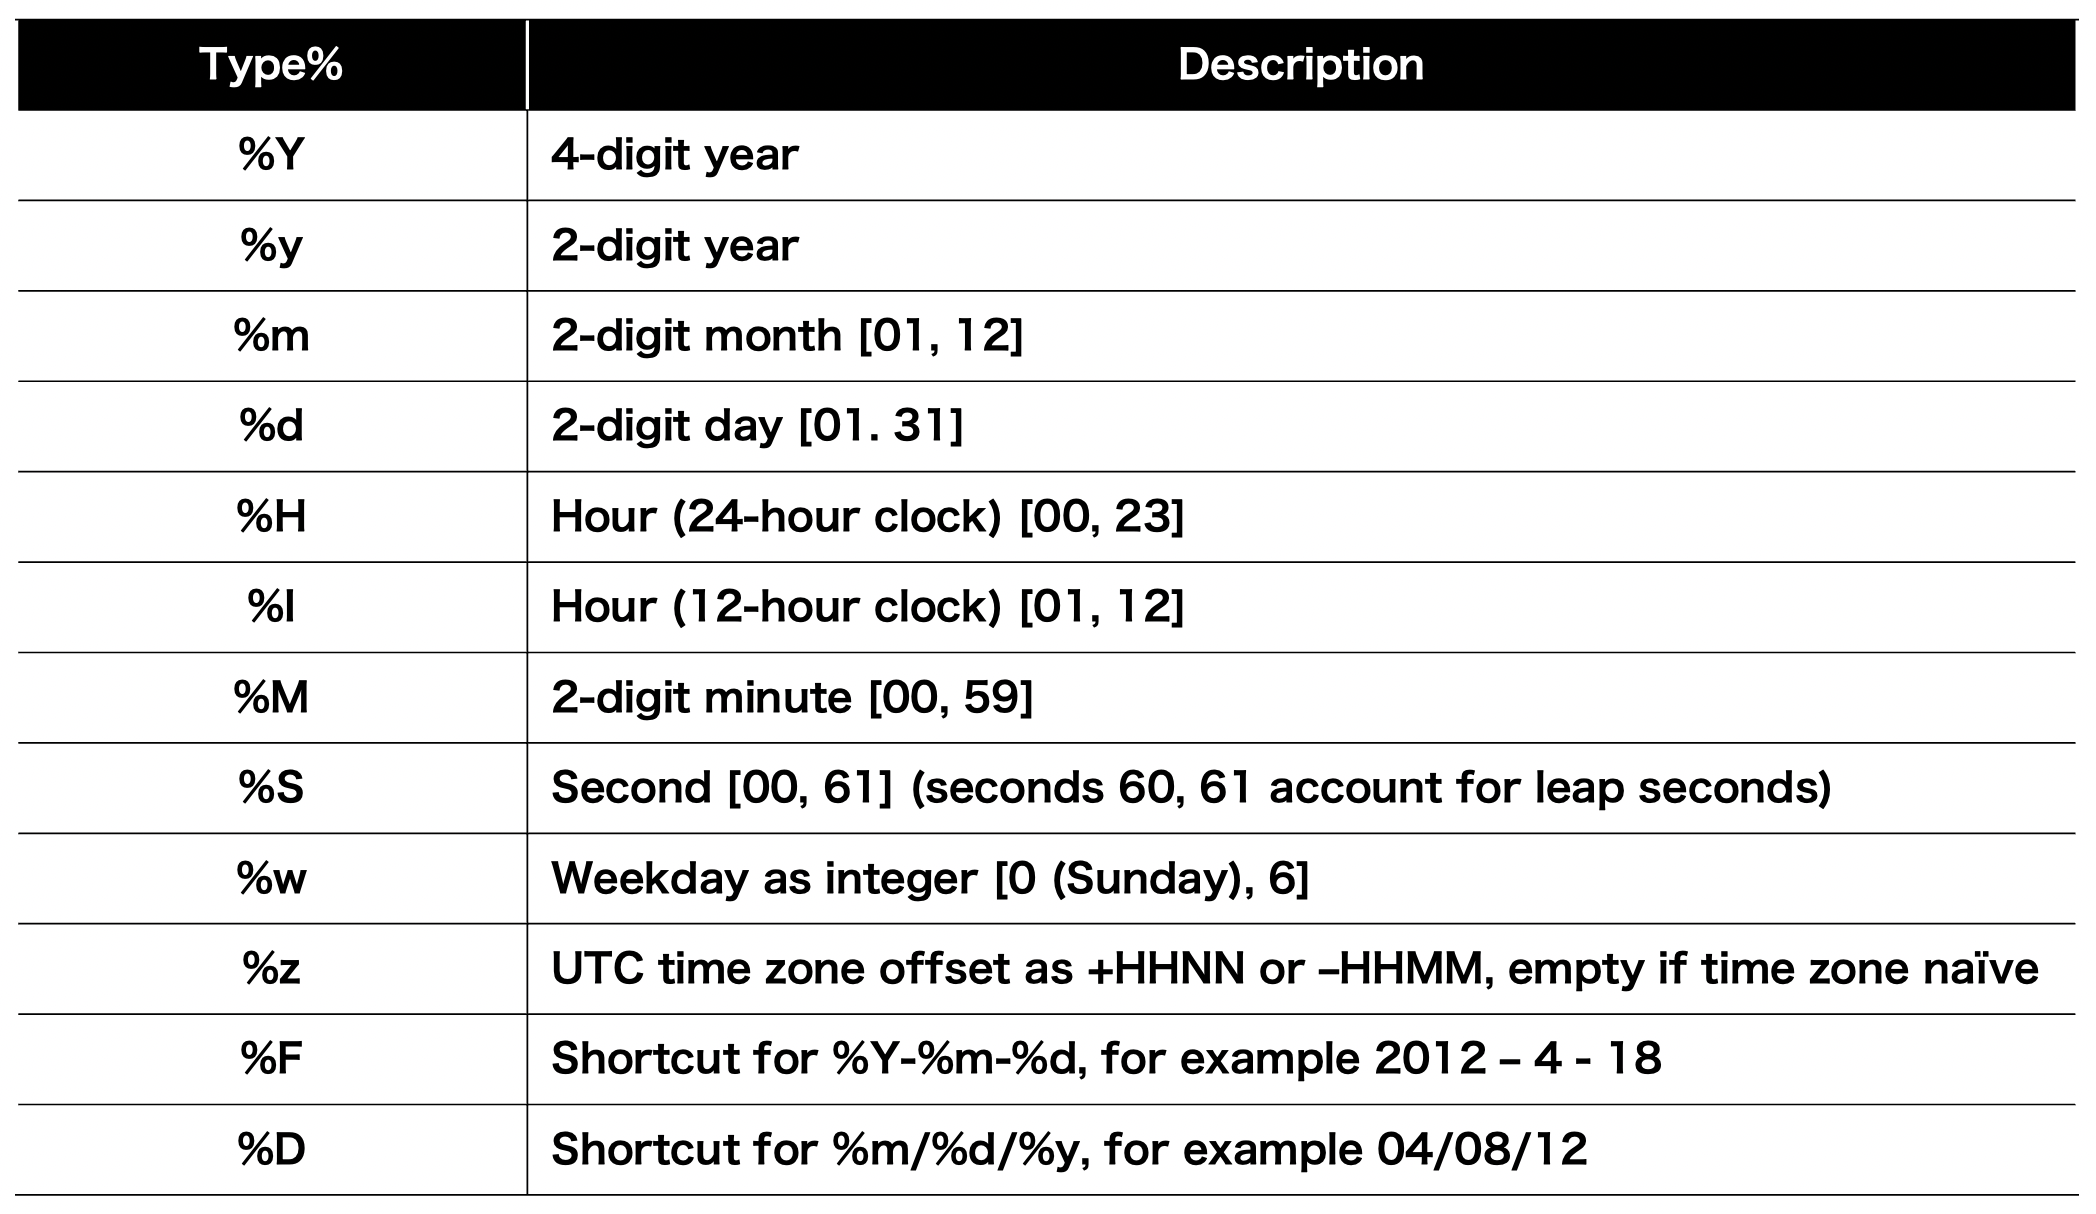

현재 날짜와 시간을 출력하시오.

In [2]:
now = datetime.now()
print(now.date())
print(now.time())

2021-05-04
13:05:07.763522


현재의 연, 월, 일을 출력하시오

In [4]:
print(now.year, now.month, now.day)

2021 5 4


현재의 시간, 분, 초, 마이크로초 출력하시오.

In [7]:
print(now.hour, now.minute, now.second, now.microsecond)
print(':'.join([str(now.hour), str(now.minute)]))

13 5 7 763522
13:5


시간 연산을 통해 어제의 날짜를 출력하시오.

In [19]:
yesterday = datetime.now() - timedelta(hours=4)

In [20]:
yesterday.date()

datetime.date(2021, 5, 4)

In [21]:
yesterday.time()

datetime.time(9, 14, 58, 200796)

시간 연산을 통해 2주 전 날짜를 출력하시오.

In [24]:
now = datetime.now()
two_week_ago1 = now - timedelta(14)
two_week_ago2 = now - 2 * timedelta(7)
print(two_week_ago1)
print(two_week_ago2)

2021-04-20 13:17:10.776468
2021-04-20 13:17:10.776468


2021년 3월 1일의 datetime 객체를 생성하시오.

In [26]:
dt = datetime(2021, 3, 1)
print(dt.year, dt.month, dt.day)

2021 3 1


### Converting between string and datetime

datetime을 문자열로 변환하시오.

In [28]:
stamp = datetime(2020, 4, 14)

In [36]:
#1 
print(str(stamp))
#2
print(datetime.strftime(stamp, '%Y-%m-%d'))
#3
print(datetime.strftime(stamp, '%y/%m/%d'))

2020-04-14 00:00:00
2020-04-14
20/04/14


문자열을 datetime으로 변환하시오.

In [38]:
value = '2021-04-14' # strptime 활용

In [41]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2021, 4, 14, 0, 0)

형태가 다르게 적힌 string들에 대해 datetime으로 변환하시오.

In [45]:
first_str_datetime = 'Jan 31, 1997 10:45 PM'
second_str_datetime = '6/12/2011'

In [46]:
parse(first_str_datetime)

datetime.datetime(1997, 1, 31, 22, 45)

In [48]:
datetime.strptime(second_str_datetime, '%d/%m/%Y')
parse(second_str_datetime)

datetime.datetime(2011, 6, 12, 0, 0)

### Time Series Basics
주어진 dates list를 바탕으로 날짜별 1~9 value를 가지는 Series를 만드시오.

In [50]:
dates = [datetime(2021, 1, 10), datetime(2021, 1, 20), datetime(2021, 1, 20),
         datetime(2021, 1, 30), datetime(2021, 2, 10), datetime(2021, 2, 20),
        datetime(2021, 3, 10), datetime(2021, 3, 20), datetime(2021, 3, 30)]

In [51]:
ts = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9], index=dates)

In [52]:
ts = pd.Series(range(1, 10), index=dates)

In [53]:
ts

2021-01-10    1
2021-01-20    2
2021-01-20    3
2021-01-30    4
2021-02-10    5
2021-02-20    6
2021-03-10    7
2021-03-20    8
2021-03-30    9
dtype: int64

### Indexing, Selection, Subsetting
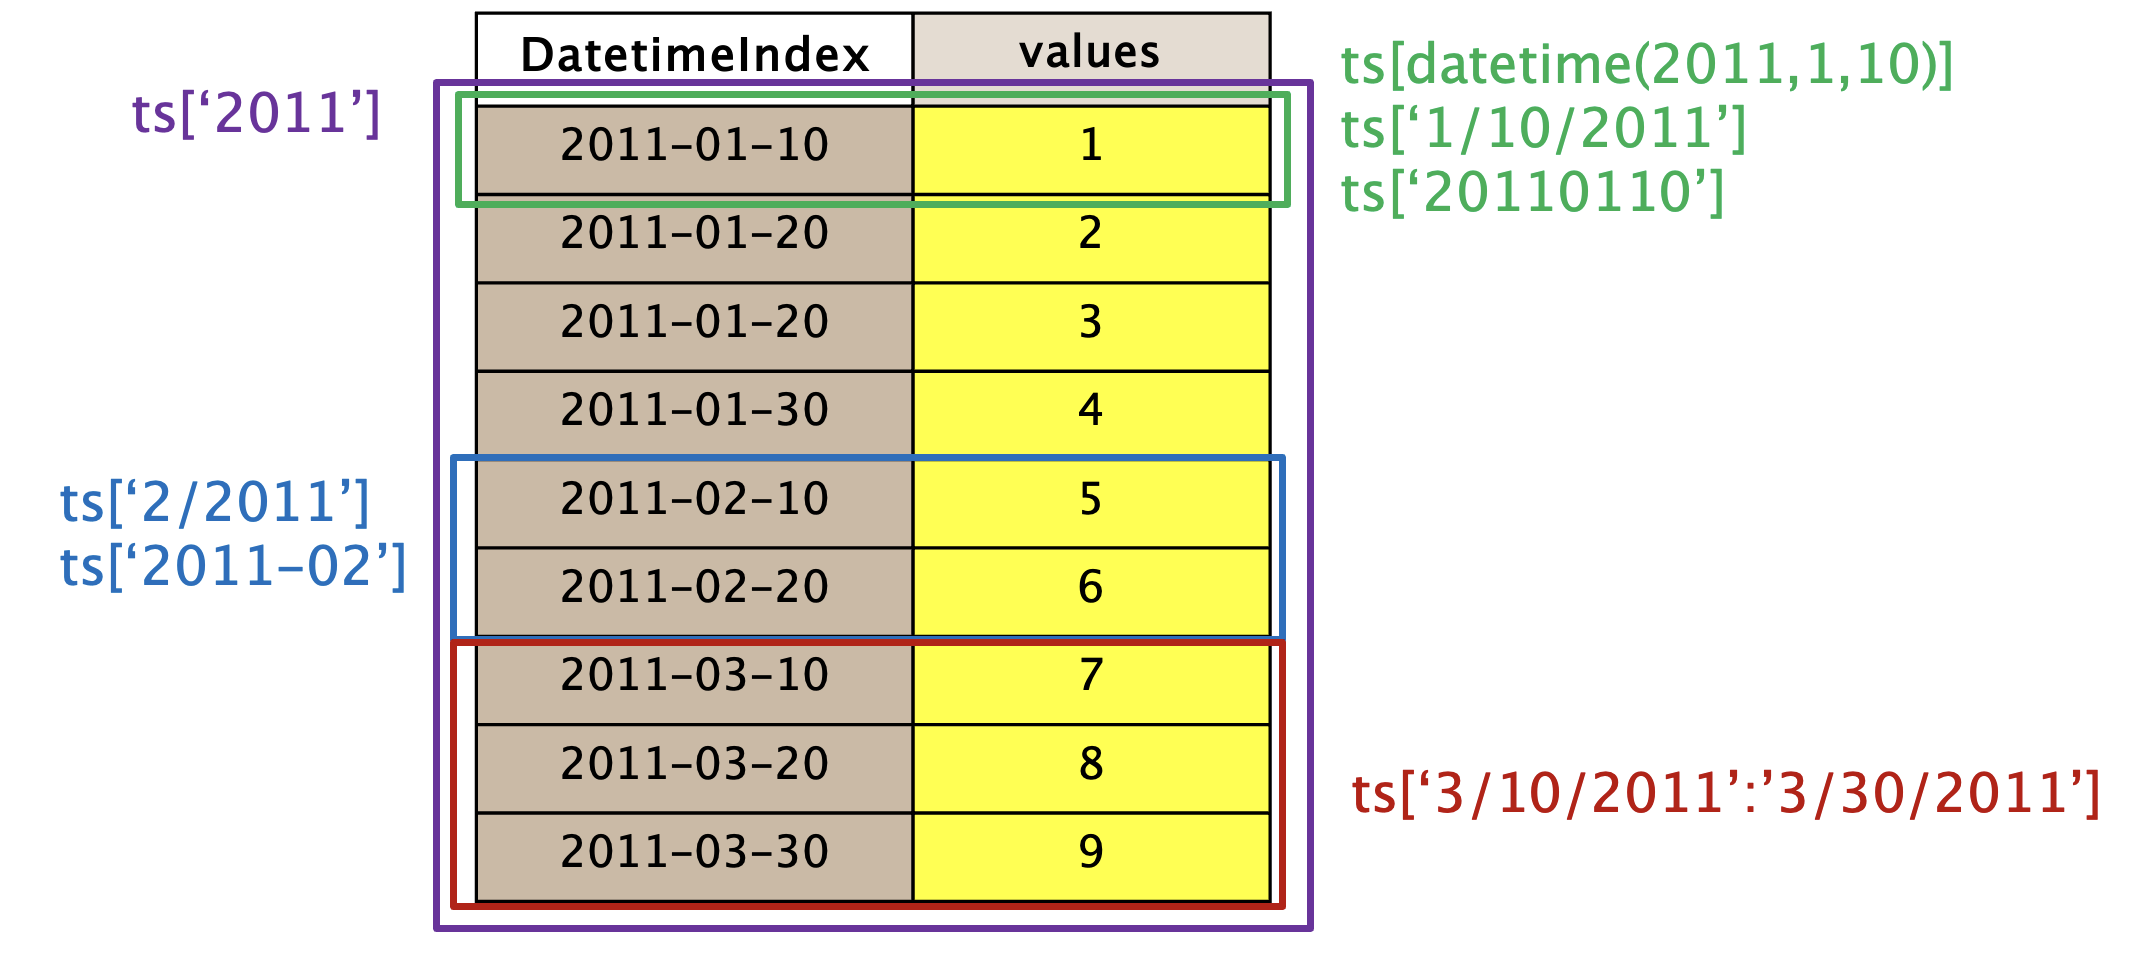

Series ts의 날짜에 맞춰 group을 지은 뒤, value의 평균값을 구하시오.

In [61]:
ts.groupby(level=0).count().head(2)

2021-01-10    1.0
2021-01-20    2.5
dtype: float64

Series ts의 날짜에 맞춰 group을 지은 뒤, 각 날짜가 몇 번 있는지 구하시오.

In [63]:
ts.groupby(level=0).count().head(2)

2021-01-10    1
2021-01-20    2
dtype: int64

## Date Ranges, Frequencies, and Shifting

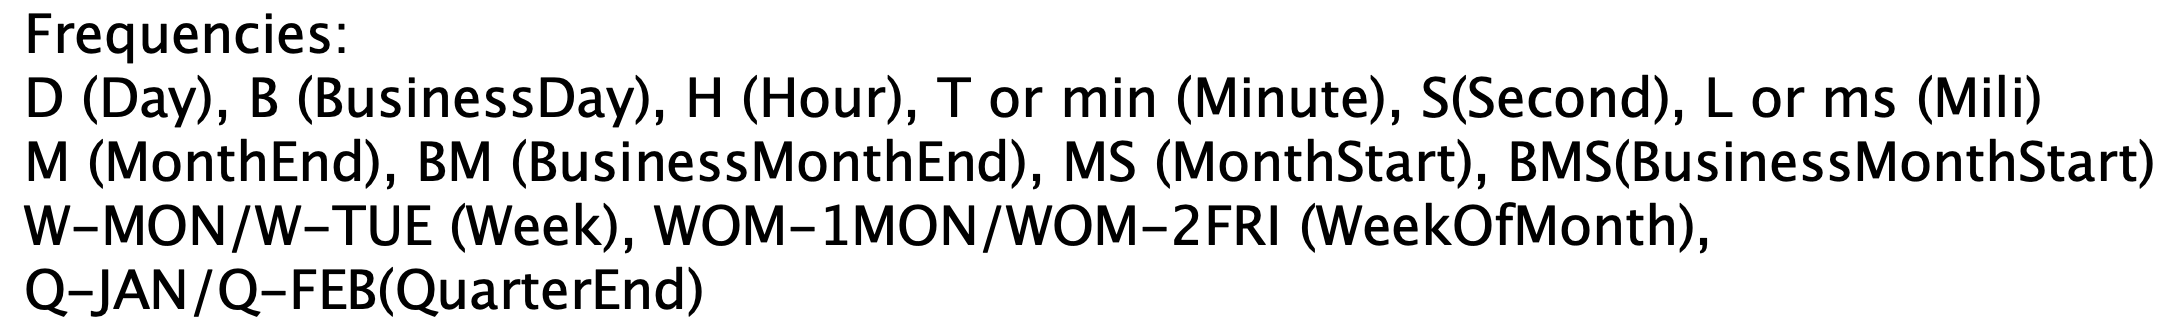

2021년 5월 1일부터 5월 10일까지의 날짜를 date_range를 활용해 출력하시오.

In [72]:
index = pd.date_range('2021-05-01', '2021-05-10')
index

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10'],
              dtype='datetime64[ns]', freq='D')

- start, periods 사용

In [73]:
pd.date_range(start='2021-05-01', periods=20)

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', freq='D')

- end, periods, freq 사용

In [77]:
pd.date_range(end='2021-05-01', periods=20, freq='6h')

DatetimeIndex(['2021-04-26 06:00:00', '2021-04-26 12:00:00',
               '2021-04-26 18:00:00', '2021-04-27 00:00:00',
               '2021-04-27 06:00:00', '2021-04-27 12:00:00',
               '2021-04-27 18:00:00', '2021-04-28 00:00:00',
               '2021-04-28 06:00:00', '2021-04-28 12:00:00',
               '2021-04-28 18:00:00', '2021-04-29 00:00:00',
               '2021-04-29 06:00:00', '2021-04-29 12:00:00',
               '2021-04-29 18:00:00', '2021-04-30 00:00:00',
               '2021-04-30 06:00:00', '2021-04-30 12:00:00',
               '2021-04-30 18:00:00', '2021-05-01 00:00:00'],
              dtype='datetime64[ns]', freq='6H')

2021년 5월 1일부터 5월 3일까지 8시간 간격을 DatetimeIndex로 저장 후 출력하시오.

In [78]:
pd.date_range('2021-05-01', '2021-05-03', freq='8h')

DatetimeIndex(['2021-05-01 00:00:00', '2021-05-01 08:00:00',
               '2021-05-01 16:00:00', '2021-05-02 00:00:00',
               '2021-05-02 08:00:00', '2021-05-02 16:00:00',
               '2021-05-03 00:00:00'],
              dtype='datetime64[ns]', freq='8H')

2020년 1월부터 2021년 1월까지 freq=BM을 사용하여 DatetimeIndex로 저장 후 출력하시오.

In [79]:
pd.date_range('2019-05-01', '2021-05-03', freq='BM')

DatetimeIndex(['2019-05-31', '2019-06-28', '2019-07-31', '2019-08-30',
               '2019-09-30', '2019-10-31', '2019-11-29', '2019-12-31',
               '2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31',
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30'],
              dtype='datetime64[ns]', freq='BM')

2020년 1월부터 2021년 1월까지 매월 3번째 금요일 날짜를 DatetimeIndex로 저장 후 출력하시오.

In [83]:
pd.date_range('1/2020', '1/2021', freq='WOM-3FRI')

DatetimeIndex(['2020-01-17', '2020-02-21', '2020-03-20', '2020-04-17',
               '2020-05-15', '2020-06-19', '2020-07-17', '2020-08-21',
               '2020-09-18', '2020-10-16', '2020-11-20', '2020-12-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Frequencies and Date Offsets

pandas Hour를 사용하여 4시간을 정의하시오.

In [85]:
four_hours = Hour(4)
four_hours

<4 * Hours>

pandas Minute을 사용하여 30분을 정의하시오.

In [86]:
half_hour = Minute(30)
half_hour

<30 * Minutes>

위에서 구한 시간과 분의 합을 구하시오.

In [89]:
(four_hours + half_hour) / Minute(60)

4.5

### Shifting (leading and lagging) data
아래 주어진 Series ts를 활용하여 ts의 value를 뒤로 두 칸 shifting 하시오.

In [91]:
ts = pd.Series(np.random.randn(4),
            index=pd.date_range('1/1/2021', periods=4, freq='M'))
ts

2021-01-31   -1.443041
2021-02-28    0.993136
2021-03-31   -0.311853
2021-04-30   -1.187195
Freq: M, dtype: float64

In [92]:
ts.shift(2)

2021-01-31         NaN
2021-02-28         NaN
2021-03-31   -1.443041
2021-04-30    0.993136
Freq: M, dtype: float64

Series ts의 value를 앞으로 두칸 shifting 하시오.

In [93]:
ts.shift(-2)

2021-01-31   -0.311853
2021-02-28   -1.187195
2021-03-31         NaN
2021-04-30         NaN
Freq: M, dtype: float64

### Exercise
Series ts의 index를 달 기준으로 뒤로 두 달씩 shifting 하시오.

In [94]:
ts.shift(2, freq='M')

2021-03-31   -1.443041
2021-04-30    0.993136
2021-05-31   -0.311853
2021-06-30   -1.187195
Freq: M, dtype: float64

Series ts의 index를 하루 기준으로 뒤로  삼 일씩 shifting 하시오.

In [95]:
ts.shift(3, freq='D')

2021-02-03   -1.443041
2021-03-03    0.993136
2021-04-03   -0.311853
2021-05-03   -1.187195
dtype: float64

## Periods and Period Arithmetic
pandas Period 함수를 이용하여 2021년 전체 Period를 p로 저장하시오.

In [98]:
p = pd.Period(2021, freq='A-DEC')
p

Period('2021', 'A-DEC')

In [99]:
print(p.start_time)
print(p.end_time)

2021-01-01 00:00:00
2021-12-31 23:59:59.999999999


2026년 전체 period를 p를 활용하여 구하시오.

In [101]:
p = pd.Period(2026, freq='A-DEC')
p

Period('2026', 'A-DEC')

In [102]:
p = pd.Period(2021, freq='A-DEC')
p + 5

Period('2026', 'A-DEC')

2019년 전체 period를 p를 활용하여 구하시오.

In [103]:
p - 2

Period('2019', 'A-DEC')

pandas period_range를 활용하여 2021년 1월부터 2021년 6월까지 freq='M'을 기준으로 기간을 저장하고 출력하시오.

In [105]:
# date_range()
rng = pd.period_range('2021-01', '2021-06', freq='M')
rng

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'], dtype='period[M]', freq='M')

In [114]:
pd.date_range('2021-01-01', '2021-06-30', freq='M')

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

위 기간을 활용해 1~6의 value를 갖는 Series ts를 만드시오.

In [108]:
ts = pd.Series(range(1, 7), index=rng)
ts

2021-01    1
2021-02    2
2021-03    3
2021-04    4
2021-05    5
2021-06    6
Freq: M, dtype: int64

### Period Frequency Conversion
2021년 Period를 freq='A-DEC을 기준으로 정의하시오.

In [117]:
p = pd.Period('2021', freq='A-DEC')

저장한 기간 p를 첫 달부터 1달 간격인 frequency로 변형하시오.

In [118]:
p.asfreq('M', how='start')

Period('2021-01', 'M')

저장한 기간 p의 마지막 달을 출력하시오.

In [119]:
p.asfreq('M', how='end')

Period('2021-12', 'M')

2021년 Period를freq='A-JUN'을 기준으로 정의하고, 해당 기간의 첫 달과 마지막 달을 출력하시오.

In [121]:
p = pd.Period('2021', freq='A-JUN')

In [122]:
print(p.start_time)
print(p.end_time)

2020-07-01 00:00:00
2021-06-30 23:59:59.999999999


아래 선언되어 있는 2021년 5월 Period를 'A-JUN'단위로 Period를 변경하시오.

In [128]:
p = pd.Period('May-2021', 'M')

In [138]:
k = p.asfreq('A-MAR')

In [139]:
print(k.start_time)
print(k.end_time)

2021-04-01 00:00:00
2022-03-31 23:59:59.999999999


### Quartely Period Frequencies
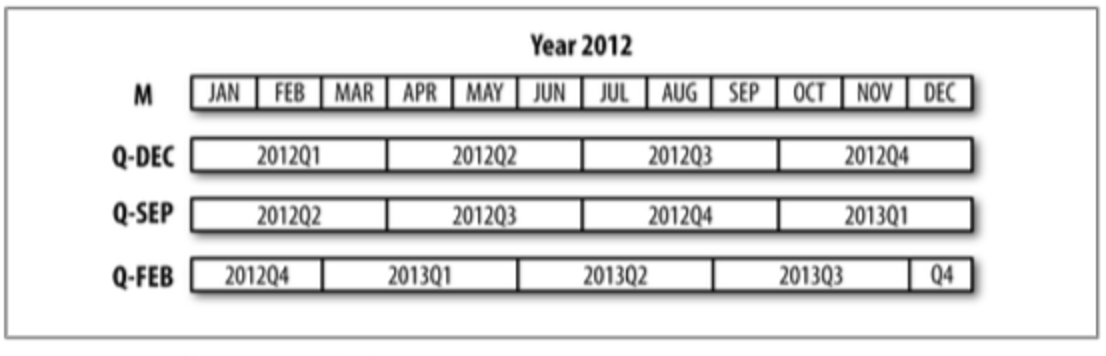

위 표를 참고하여 freq을 Q-DEC, Q-SEP, Q-FEB으로 하는 Period의 시작과 끝 달을 출력하시오.
- Q-DEC

In [169]:
p = pd.Period('2021Q1', freq='Q-DEC')
print(p.start_time)
print(p.end_time)

2021-01-01 00:00:00
2021-03-31 23:59:59.999999999


In [170]:
p

Period('2021Q1', 'Q-DEC')

- Q-SEP

In [171]:
p = pd.Period('2021Q1', freq='Q-SEP')
print(p.start_time)
print(p.end_time)

2021-01-01 00:00:00
2021-03-31 23:59:59.999999999


In [172]:
p

Period('2021Q2', 'Q-SEP')

- Q-FEB

In [164]:
p = pd.Period('2021Q1', freq='Q-FEB')
print(p.start_time)
print(p.end_time)

2020-03-01 00:00:00
2020-05-31 23:59:59.999999999


## Resampling and Frequency Conversion

아래 주어진 Series ts를 활용하여 달 별 평균, 주 별 평균을 구하시오.

In [173]:
rng = pd.date_range('1/1/2021', periods=59, freq='D')
ts = pd.Series(randn(len(rng)), index=rng)
ts.head(4)

2021-01-01    0.100176
2021-01-02   -1.626293
2021-01-03   -1.168361
2021-01-04   -0.528586
Freq: D, dtype: float64

- 달 별 평균

In [174]:
# resample 활용
ts.resample('M').mean()

2021-01-31   -0.274597
2021-02-28   -0.076544
Freq: M, dtype: float64

- 주 별 평균

In [175]:
ts.resample('W').mean()

2021-01-03   -0.898159
2021-01-10   -0.810966
2021-01-17    0.542998
2021-01-24   -0.319481
2021-01-31   -0.243697
2021-02-07   -0.556246
2021-02-14   -0.172779
2021-02-21    0.257707
2021-02-28    0.165140
Freq: W-SUN, dtype: float64

### Downsampling
아래 그림에서 closed를 left, right으로 하는지, label을 left, right으로 하는지에 따라 지어지는 그룹에 대해 확인해보자.
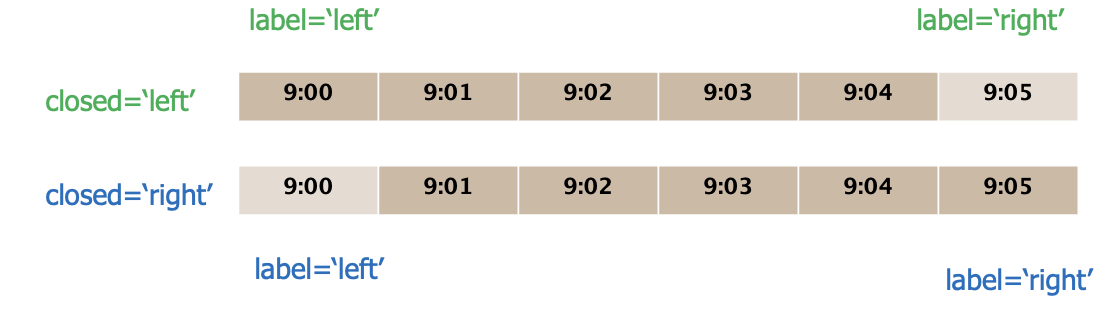

아래 주어진 Series ts를 활용하여 주어진 시간 구간 조건 별 총합을 구하시오.

In [197]:
rng = pd.date_range('1/1/2021', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2021-01-01 00:00:00     0
2021-01-01 00:01:00     1
2021-01-01 00:02:00     2
2021-01-01 00:03:00     3
2021-01-01 00:04:00     4
2021-01-01 00:05:00     5
2021-01-01 00:06:00     6
2021-01-01 00:07:00     7
2021-01-01 00:08:00     8
2021-01-01 00:09:00     9
2021-01-01 00:10:00    10
2021-01-01 00:11:00    11
Freq: T, dtype: int64

- 5분 간격 구간 별 value 총합

In [181]:
ts.resample('5min').sum()

2021-01-01 00:00:00    10
2021-01-01 00:05:00    35
2021-01-01 00:10:00    21
Freq: 5T, dtype: int64

- 5분 간격 구간 별 value 총합 (closed = 'left')

In [182]:
ts.resample('5min', closed='left').sum()

2021-01-01 00:00:00    10
2021-01-01 00:05:00    35
2021-01-01 00:10:00    21
Freq: 5T, dtype: int64

- 5분 간격 구간 별 value 총합 (closed = 'left', label = 'left')

In [187]:
ts.resample('5min', closed='left', label='right').sum()

2021-01-01 00:05:00    10
2021-01-01 00:10:00    35
2021-01-01 00:15:00    21
Freq: 5T, dtype: int64

- 5분 간격 구간 별 value 총합 (closed = 'left', label = 'right')

- 5분 간격 구간 별 value 총합 (closed = 'right')

- 5분 간격 구간 별 value 총합 (closed = 'right', label = 'left')

- 5분 간격 구간 별 value 총합 (closed = 'right', label = 'right')

#### Open-High-Low-Close (OHLC) resampling
주어진 Series ts를 활용하여 5분 간격 구간 별 평균, 중앙값, 최소값, 최대값, 처음값, 마지막값을 구하시오.
- mean, median, min, max, first, last

In [198]:
ts

2021-01-01 00:00:00     0
2021-01-01 00:01:00     1
2021-01-01 00:02:00     2
2021-01-01 00:03:00     3
2021-01-01 00:04:00     4
2021-01-01 00:05:00     5
2021-01-01 00:06:00     6
2021-01-01 00:07:00     7
2021-01-01 00:08:00     8
2021-01-01 00:09:00     9
2021-01-01 00:10:00    10
2021-01-01 00:11:00    11
Freq: T, dtype: int64

In [199]:
ts.resample('5min').sum()

2021-01-01 00:00:00    10
2021-01-01 00:05:00    35
2021-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [200]:
ts.resample('5min', label='right').sum()

2021-01-01 00:05:00    10
2021-01-01 00:10:00    35
2021-01-01 00:15:00    21
Freq: 5T, dtype: int64

In [201]:
ts

2021-01-01 00:00:00     0
2021-01-01 00:01:00     1
2021-01-01 00:02:00     2
2021-01-01 00:03:00     3
2021-01-01 00:04:00     4
2021-01-01 00:05:00     5
2021-01-01 00:06:00     6
2021-01-01 00:07:00     7
2021-01-01 00:08:00     8
2021-01-01 00:09:00     9
2021-01-01 00:10:00    10
2021-01-01 00:11:00    11
Freq: T, dtype: int64

In [202]:
ts.resample('5min', closed='right', label='left').mean()

2020-12-31 23:55:00     0
2021-01-01 00:00:00     3
2021-01-01 00:05:00     8
2021-01-01 00:10:00    11
Freq: 5T, dtype: int64

5분 간격 구간 별 요약 정보 (open, high, low, close)를 보이시오.
- .ohlc() 함수 활용

In [203]:
ts.resample('5min').ohlc()

,open,high,low,close
2021-01-01 00:00:00,0,4,0,4
2021-01-01 00:05:00,5,9,5,9
2021-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy
아래 주어진 Series ts를 활용하여 달 별 평균, 주 별 평균을 구하시오.
- groupby() 함수 활용

In [204]:
rng = pd.date_range('1/1/2021', periods=100, freq='D')
rng

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [205]:
ts = pd.Series(np.arange(100), index=rng)
ts

2021-01-01     0
2021-01-02     1
2021-01-03     2
2021-01-04     3
2021-01-05     4
              ..
2021-04-06    95
2021-04-07    96
2021-04-08    97
2021-04-09    98
2021-04-10    99
Freq: D, Length: 100, dtype: int64

- 달 별 평균

In [206]:
ts.resample('M').mean()

2021-01-31    15.0
2021-02-28    44.5
2021-03-31    74.0
2021-04-30    94.5
Freq: M, dtype: float64

In [208]:
ts.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64')

In [209]:
ts.groupby(lambda x: x.month).mean()

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64

- 주 별 평균

### Upsampling and interpolation
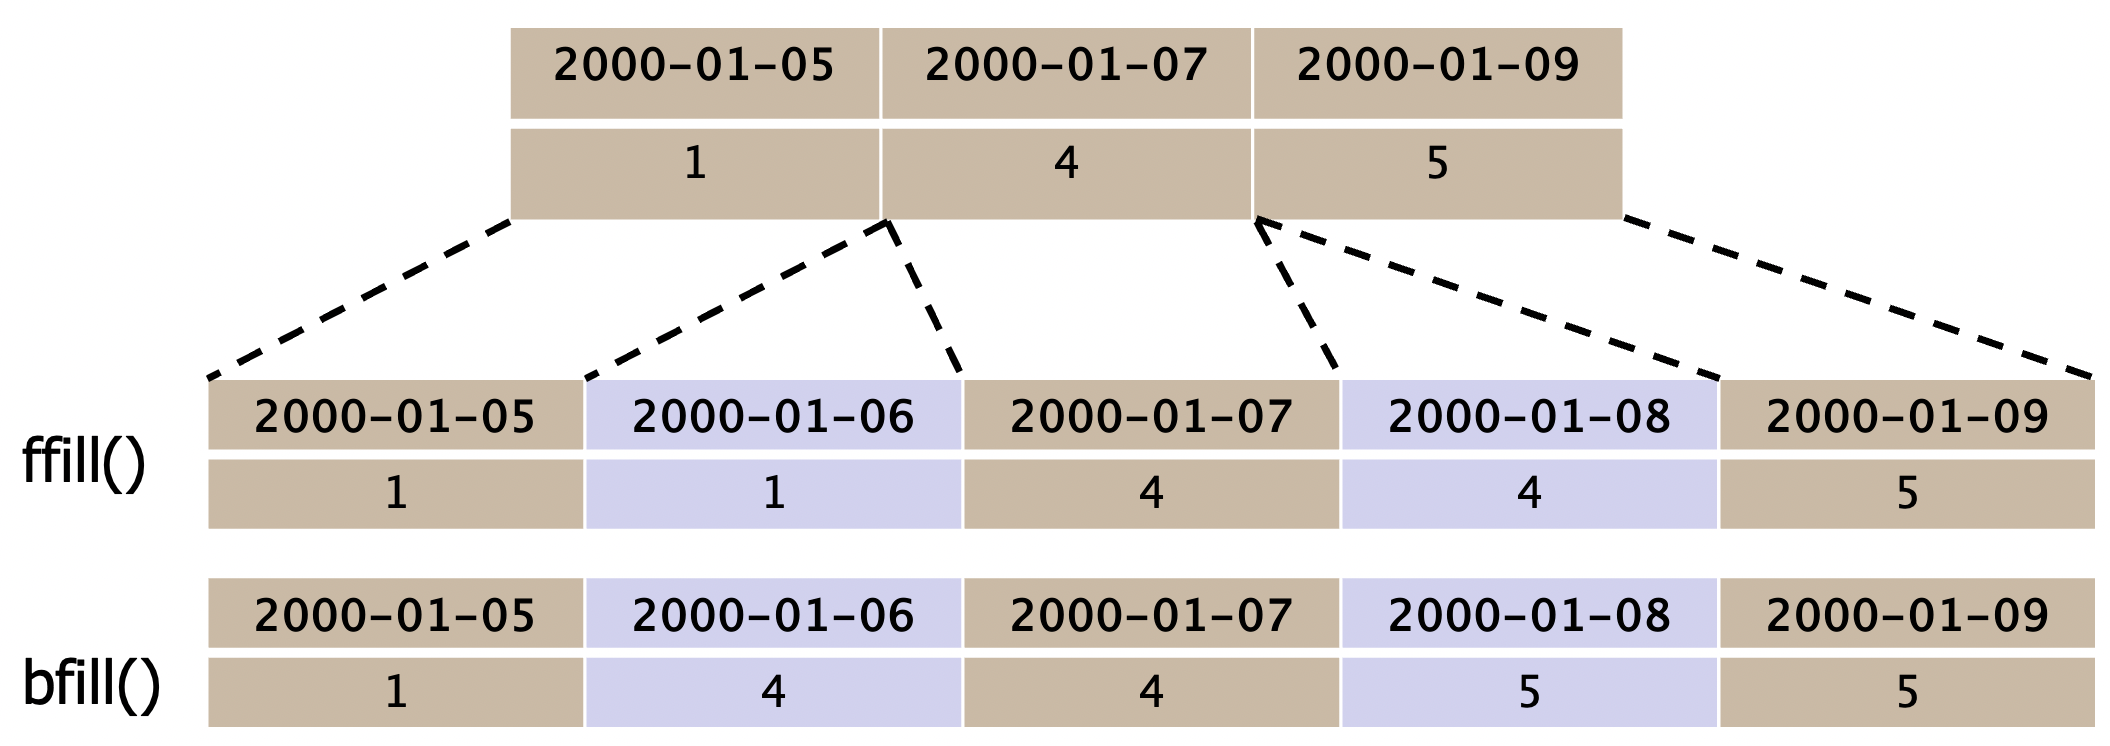

아래 주어진 DataFrame frame을 활용하여 1/5부터 1/12사이 구간을 보간하시오.

In [210]:
frame = pd.DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.343146,0.067818,2.193944,-0.428876
2000-01-12,0.724613,-1.093253,0.530428,-0.387121


사이 구간 1일 간격으로 나누고 앞에 존재하는 데이터의 값으로 채우시오.
- ffill() 함수 사용

In [213]:
frame.resample('h').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05 00:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-05 01:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-05 02:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-05 03:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-05 04:00:00,-0.343146,0.067818,2.193944,-0.428876
...,...,...,...,...
2000-01-11 20:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-11 21:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-11 22:00:00,-0.343146,0.067818,2.193944,-0.428876
2000-01-11 23:00:00,-0.343146,0.067818,2.193944,-0.428876


사이 구간 1일 간격으로 나누고 뒤에 존재하는 데이터의 값으로 채우시오.
- bfill() 함수 사용

In [212]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.343146,0.067818,2.193944,-0.428876
2000-01-06,0.724613,-1.093253,0.530428,-0.387121
2000-01-07,0.724613,-1.093253,0.530428,-0.387121
2000-01-08,0.724613,-1.093253,0.530428,-0.387121
2000-01-09,0.724613,-1.093253,0.530428,-0.387121
2000-01-10,0.724613,-1.093253,0.530428,-0.387121
2000-01-11,0.724613,-1.093253,0.530428,-0.387121
2000-01-12,0.724613,-1.093253,0.530428,-0.387121


### Resampling with periods

아래 주어진 DataFrame frame을 활용하여 연도별 평균값을 구하시오.

In [214]:
frame = pd.DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,0.304445,-1.264031,-0.480904,-0.371996
2000-02,-0.703346,0.980143,-0.452047,0.790103
2000-03,-0.293071,-0.043219,-0.150220,-0.319239
2000-04,-0.132617,0.008763,-0.781969,0.214770
2000-05,-0.679624,0.914017,1.143354,-0.479112
2000-06,1.217956,0.941610,0.763729,0.115024
2000-07,0.954441,0.132650,0.830302,-0.257044
2000-08,-1.848856,-1.371368,-1.371972,-0.121068
2000-09,0.898251,-0.295000,0.104395,0.150388
2000-10,0.193364,-0.090581,0.513836,0.858963


In [215]:
frame.resample('Y').mean()

,Colorado,Texas,New York,Ohio
2000,0.028660,-0.027720,-0.129320,-0.005842
2001,-0.138955,0.069488,-0.133665,0.024027


In [221]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.028660,-0.027720,-0.129320,-0.005842
2001,-0.138955,0.069488,-0.133665,0.024027


### Exercise
위에서 구한 연도별 평균값 DataFrame을 활용하여 분기별 데이터 보간을 하시오.
- Q-DEC 사용

In [223]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.028660,-0.027720,-0.129320,-0.005842
2001,-0.138955,0.069488,-0.133665,0.024027


In [224]:
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.028660,-0.027720,-0.129320,-0.005842
2000Q2,0.028660,-0.027720,-0.129320,-0.005842
2000Q3,0.028660,-0.027720,-0.129320,-0.005842
2000Q4,0.028660,-0.027720,-0.129320,-0.005842
2001Q1,-0.138955,0.069488,-0.133665,0.024027
2001Q2,-0.138955,0.069488,-0.133665,0.024027
2001Q3,-0.138955,0.069488,-0.133665,0.024027
2001Q4,-0.138955,0.069488,-0.133665,0.024027


- Q-MAR 사용

In [226]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.028660,-0.027720,-0.129320,-0.005842
2001Q1,0.028660,-0.027720,-0.129320,-0.005842
2001Q2,0.028660,-0.027720,-0.129320,-0.005842
2001Q3,0.028660,-0.027720,-0.129320,-0.005842
2001Q4,-0.138955,0.069488,-0.133665,0.024027
2002Q1,-0.138955,0.069488,-0.133665,0.024027
2002Q2,-0.138955,0.069488,-0.133665,0.024027
2002Q3,-0.138955,0.069488,-0.133665,0.024027


## Time series plotting
아래 주어진 stock_px.csv를 불러와 AAPL, MSFT, XOM을 column으로 가지는 DataFrame을 만들고, Freq='B'를 기준으로 데이터 보간을 하시오.

In [228]:
close_px_all = pd.read_csv('data/stock_px.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


- ffill() 사용

In [229]:
close_px_all.shape

(2214, 4)

In [230]:
close_px = close_px_all.resample("B").ffill()
close_px.shape

(2292, 4)

In [231]:
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


AAPL의 주가 그래프를 그리시오.

<AxesSubplot:>

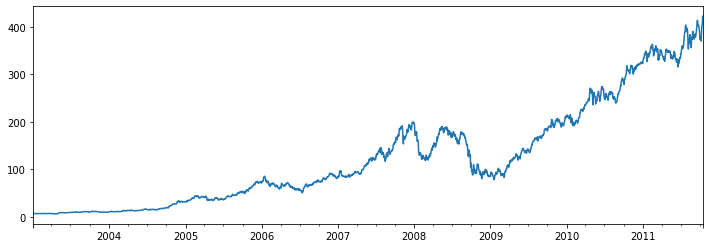

In [232]:
close_px['AAPL'].plot()

<AxesSubplot:>

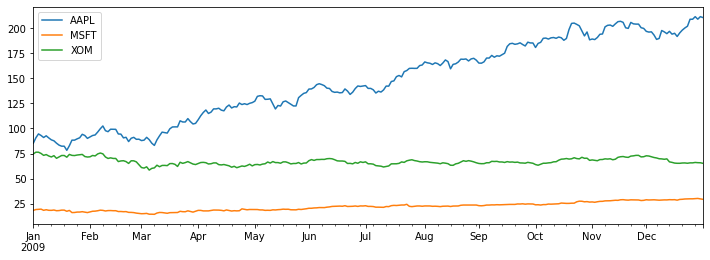

In [233]:
close_px.loc['2009', ['AAPL', 'MSFT', 'XOM']].plot()

2009년 기간동안 AAPL, MSFT, XOM의 주가 그래프를 그리시오.

### Exercise
2011년 1월부터 2011년 3월까지 AAPL의 주가 그래프를 그리시오.

<AxesSubplot:>

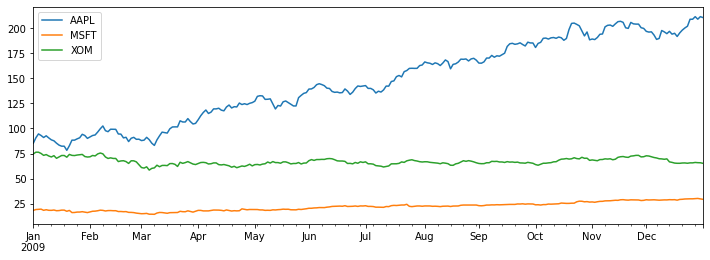

In [233]:
close_px.loc['2009', ['AAPL', 'MSFT', 'XOM']].plot()

<AxesSubplot:>

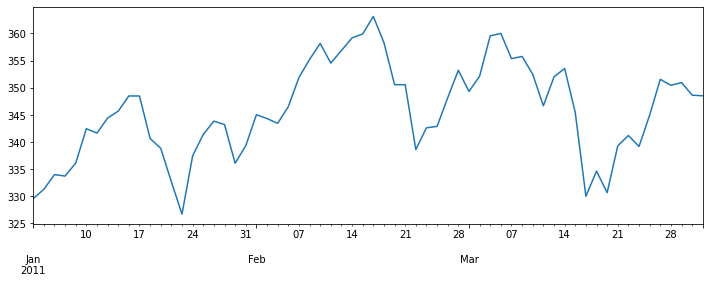

In [239]:
close_px.loc['01-2011':'03-2011', 'AAPL'].plot()

<AxesSubplot:>

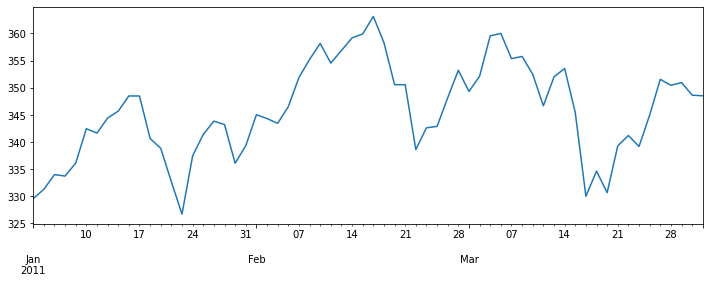

In [238]:
close_px.loc['2011-01':'2011-03', 'AAPL'].plot()

<AxesSubplot:>

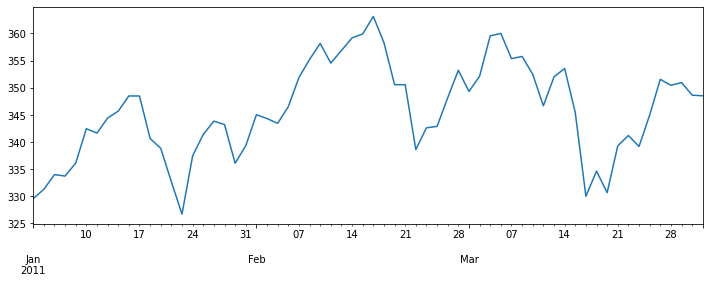

In [237]:
close_px["AAPL"].loc['2011-01':'2011-03', 'AAPL'].plot()

## Moving window functions

주어진 DataFrame close_px를 활용하여 AAPL의 250일 이동평균 그래프를 그리시오.

In [243]:
close_px.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<AxesSubplot:>

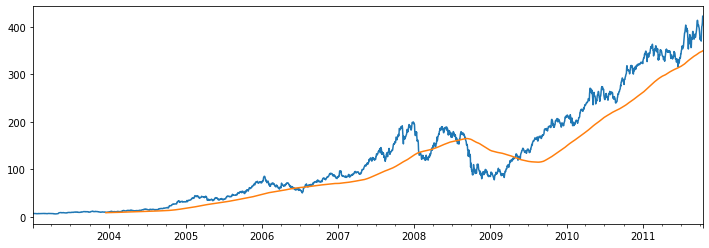

In [244]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

주어진 DataFrame close_px를 활용하여 AAPL의 주가 그래프, 50, 150, 250, 350일 이동평균 그래프를 함께 그리시오.

<AxesSubplot:>

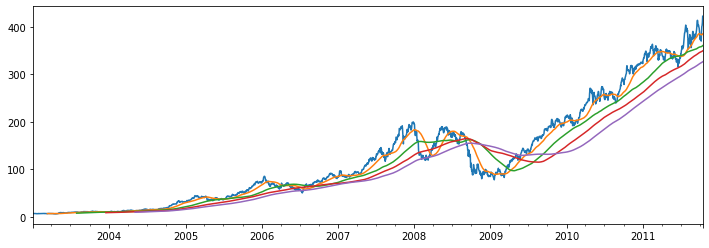

In [245]:
close_px.AAPL.plot()
close_px.AAPL.rolling(50).mean().plot()
close_px.AAPL.rolling(150).mean().plot()
close_px.AAPL.rolling(250).mean().plot()
close_px.AAPL.rolling(350).mean().plot()

주어진 DataFrame close_px를 활용하여 AAPL의 250일 이동 표준편차 그래프를 그리시오.
- 구간 내 데이터가 최소 10개 이상 존재하면 계산

In [248]:
close_px.AAPL.rolling(5, min_periods=2).mean()

2003-01-02           NaN
2003-01-03      7.425000
2003-01-06      7.433333
2003-01-07      7.432500
2003-01-08      7.402000
                 ...    
2011-10-10    377.346000
2011-10-11    382.904000
2011-10-12    387.692000
2011-10-13    393.904000
2011-10-14    404.344000
Freq: B, Name: AAPL, Length: 2292, dtype: float64

주어진 DataFrame close_px를 활용하여 AAPL, MSFT, XOM의 60일 이동평균 주가 그래프를 그리시오.
- y축 log scale 활용을 위해 logy=True 사용

<AxesSubplot:>

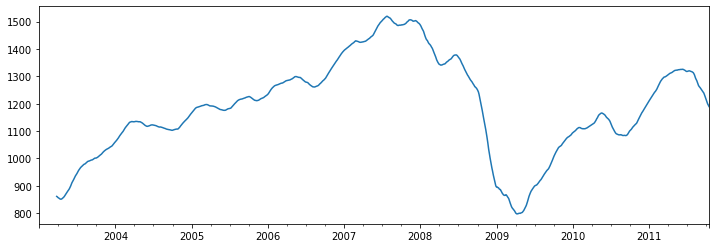

In [250]:
close_px["SPX"].rolling(60).mean().plot()

<AxesSubplot:>

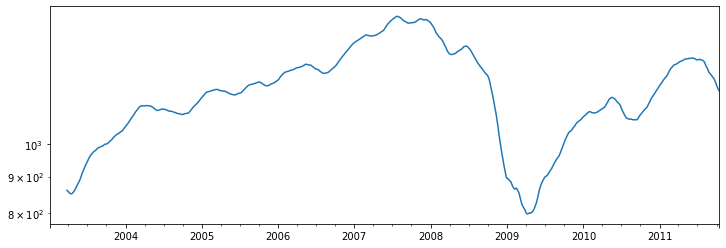

In [251]:
close_px["SPX"].rolling(60).mean().plot(logy=True)

In [140]:
plt.close('all')

### Exponentially-weighted functions
- 2005~2009년 데이터만 이용
- AAPL 주가 그래프와 rolling을 활용한 60일 이동 평균 그래프를 함께 나타내시오.
- AAPL 주가 그래프와 ewm을 활용한 60일 이동 평균 그래프를 함께 나타내시오.

<AxesSubplot:>

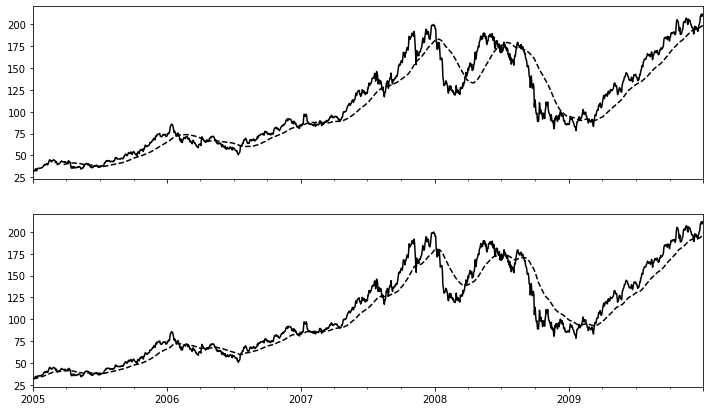

In [255]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(12, 7))

aapl = close_px.loc['2005':'2009', 'AAPL']

ma60 = aapl.rolling(60).mean()
ewma60 = aapl.ewm(span=60).mean()

aapl.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])

aapl.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])